# Trigonometric Interpolation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Sections
- [Fourier Series Expansion for General (Periodic) Data](#Fourier-Series-Expansion-for-General-(Periodic)-Data)
- [Cosine Series Expansion for Even Data](#Cosine-Series-Expansion-for-Even-Data)
- [Sine Series Expansion for Odd Data](#Sine-Series-Expansion-for-Odd-Data)

### Fourier Series Expansion for General (Periodic) Data

###### $$f_j=\sum_k a_k\cos(kx_j) + b_k\sin(kx_j)$$

In [2]:
data = np.array([ 0.        ,  0.17696606,  0.34115286,  0.48599769,  0.60997088,
        0.71471151,  0.80356439,  0.88061665,  0.9501694 ,  1.01652148,
        1.08393925,  1.15670194,  1.23912216,  1.33543749,  1.44945452,
        1.58381664,  1.73879163,  1.91058035,  2.08937646,  2.25776248,
        2.39041069,  2.45622853,  2.42371559,  2.26917337,  1.98574833,
        1.58989768,  1.12183251,  0.63840354,  0.20012714, -0.14313039,
       -0.36261904, -0.45403664, -0.43371794, -0.33040834, -0.17627887,
        0.        ])

In [3]:
# Plot the data
#N = len(data)
#L = np.pi
#x = np.linspace(-L,L,N)
#plt.plot(x,data,'b.')
#plt.xlabel('x')
#plt.ylabel('y')
#plt.title('Data');

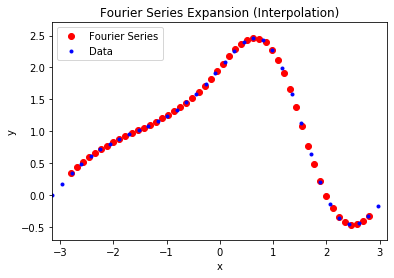

In [14]:
N = len(data)
L = np.pi
# Spatial grid
x = np.linspace(-L,L,N)
x = x[:-1] # Evaluations at first and last endpoint are added together due to periodicity
# k = -Nk/2+1 ... Nk/2
# Frequency grid
Nk = 8
k = np.arange(-Nk/2+1,Nk/2+1) # Recall arange leaves out last value
# Outer Product for Fitting
kx = np.outer(k,x)
C = np.cos(np.outer(k,x))
S = np.sin(np.outer(k,x))


# Compute Fourier coefficients
f = data[:-1]
a = C.dot(f)/(N-1)
b = S.dot(f)/(N-1)

# Test Fit
xk = np.outer(k,x) # Outer Product for Interpolating (Collocating)
Fc = a.dot(C) # Cosine (even part) Collocation
Fs = b.dot(S) # Sine (odd part) Collocation
# Construct the Fourier series expansion
F = Fc + Fs # DFT Collocation (Fit the Data)

# Interpolate
xi = np.linspace(-2.8,2.8)
Ni = len(xi)
kxi = np.outer(k,xi) # Outer Product for Interpolating
Ci = np.cos(kxi)
Si = np.sin(kxi)
Fci = a.dot(Ci) # Cosine (even part) Interpolant
Fsi = b.dot(Si) # Sine (odd part) Interpolant
# Construct the Fourier series expansion
Fi = Fci + Fsi # Trigonometric (DFT) Interpolation
#print(len(Fi))

#plt.plot(x,F,'ro') # Fit
plt.plot(xi,Fi,'ro',x,f,'b.') # Interpolant
plt.axis([-L,L,np.min(f)-0.25,np.max(f)+0.25])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fourier Series Expansion (Interpolation)')
plt.legend(['Fourier Series','Data']);

-[back to top](#Sections)

### Cosine Series Expansion for Even Data
* $\varphi_k(x) = \cos(kx)$ on $[-\pi,\pi]$

###### $$f_j = \sum_k a_k\cos(kx_j)\qquad  b_k=0~\forall k$$


###### Data from an even function

In [5]:
even_data = np.array([5.17231862e-05, 1.77385076e-04, 5.60359534e-04, 1.63055080e-03,
       4.37038583e-03, 1.07900413e-02, 2.45382909e-02, 5.14023998e-02,
       9.91837124e-02, 1.76284937e-01, 2.88607709e-01, 4.35229706e-01,
       6.04570583e-01, 7.73558875e-01, 9.11711881e-01, 9.89782418e-01,
       9.89782418e-01, 9.11711881e-01, 7.73558875e-01, 6.04570583e-01,
       4.35229706e-01, 2.88607709e-01, 1.76284937e-01, 9.91837124e-02,
       5.14023998e-02, 2.45382909e-02, 1.07900413e-02, 4.37038583e-03,
       1.63055080e-03, 5.60359534e-04, 1.77385076e-04, 5.17231862e-05])

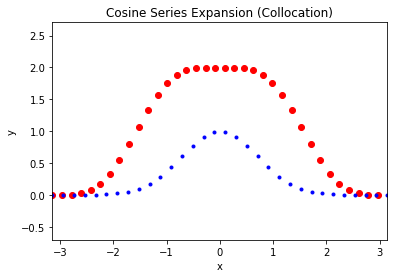

In [6]:
# Set up the spatial grid, frequency grid, grid-matrix, and frequency-matrix
L = np.pi
N = len(even_data)
Nk = 9
# Spatial grid
# Evaluations at first and last endpoint are added together due to periodicity
# k = -Nk/2+1 ... Nk/2
# Frequency grid

# Compute the Fourier Cosine coefficients

# Construct the Fourier Cosine series (call it Fc)

# Test the fit on the EVEN data
plt.plot(x,Fc,'ro',np.linspace(-L,L,N),even_data,'b.')
plt.axis([-L,L,np.min(f)-0.25,np.max(f)+0.25])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cosine Series Expansion (Collocation)');

###### Interpolation

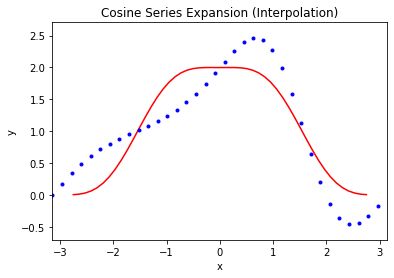

In [7]:
xi = np.linspace(-2.75,2.75) # Interpolation grid
Ni = len(xi)
# Interpolate the data on the given grid (call it Fci)
# Recall that interpolation reverses the outer product!

plt.plot(xi,Fci,'r',x,f,'b.')
plt.axis([-L,L,np.min(f)-0.25,np.max(f)+0.25])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cosine Series Expansion (Interpolation)');

-[back to top](#Sections)

### Sine Series Expansion for Odd Data
* $\varphi_k(x) = \sin(kx)$ on $[-\pi,\pi]$

###### $$f_j=\sum_j b_k\sin(kx_j)\qquad  a_k=0~\forall k$$

###### Data from an odd function

In [8]:
odd_data = np.array([  0.        ,   3.62196109,   6.51952996,   8.7426647 ,
        10.34132339,  11.36546411,  11.86504495,  11.89002399,
        11.49035932,  10.71600902,   9.61693117,   8.24308386,
         6.64442517,   4.87091319,   2.972506  ,   0.99916168,
        -0.99916168,  -2.972506  ,  -4.87091319,  -6.64442517,
        -8.24308386,  -9.61693117, -10.71600902, -11.49035932,
       -11.89002399, -11.86504495, -11.36546411, -10.34132339,
        -8.7426647 ,  -6.51952996,  -3.62196109,   0.        ])

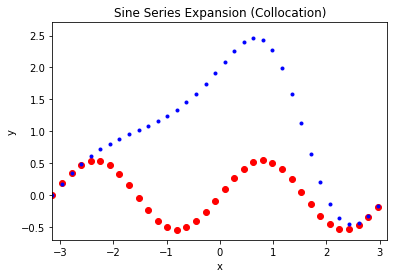

In [9]:
# Set up the spatial grid, frequency grid, grid-matrix, and frequency-matrix
L = np.pi
N = len(odd_data)
Nk = 16# Spatial grid
# Evaluations at first and last endpoint are added together due to periodicity
# k = -Nk/2+1 ... Nk/2
# Frequency grid

# Compute the Fourier Sine coefficients

# Construct the Fourier Sine series (call it Fs)

# Test the fit on the ODD data

plt.plot(x,Fs,'ro',x,f,'b.')
plt.axis([-L,L,np.min(f)-0.25,np.max(f)+0.25])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sine Series Expansion (Collocation)');

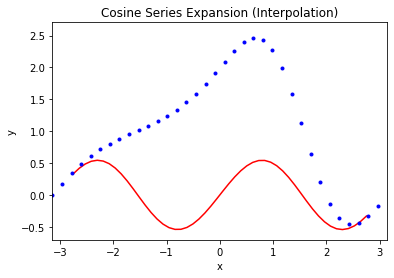

In [10]:
xi = np.linspace(-2.75,2.75) # Interpolation grid
Ni = len(xi)# Interpolate the data on the given grid (call it Fsi)
# Recall that interpolation reverses the outer product!

plt.plot(xi,Fsi,'r',x,f,'b.')
plt.axis([-L,L,np.min(f)-0.25,np.max(f)+0.25])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cosine Series Expansion (Interpolation)');

-[back to top](#Sections)